<a href="https://colab.research.google.com/github/juanjosemarinm/SyS2025-2/blob/main/Taller_2_casilisto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicios Teórico-Prácticos: Transformadas de Fourier, Laplace y Z**

## **Señales y Sistemas 2025**


**Profesor:** Andrés Marino Álvarez Meza, Ph.D.  

*Departamento de Ingeniería Eléctrica, Electrónica y Computación.*

*Universidad Nacional de Colombia - sede Manizales*

#**1. Transformada de fourier**

##1.1 Consultar y realizar los ejercicios propuestos en el cuaderno  Transformada de fourier

###**Solucion**
https://colab.research.google.com/drive/14pDJpIfpV8fZ94TOLwgKIx6H87q4SDNo

##1.2  Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta), la transformada de Fourier, transformada de Fourier en tiempo discreto (DTFT) y transformada discreta de Fourier (DFT). Considere las diferentes combinaciones entre: espectro continuo y discreto y señal en tiempo continuo y discreto. Ademas, consulte en que consiste el algoritmo Fast Fourier Transform - (FFT) y su utilidad para el calculo de la transformada discreta de Fourier. Explique en detalle el algoritmo FFT y su costo computacional vs el de la transformada discreta. Ver cuaderno Transformada de Fourier.

###**Solucion**


##Comparativa de las Herramientas de Fourier

Las herramientas de Fourier nos permiten analizar una señal descomponiéndola en sus frecuencias constituyentes, es decir, pasando del dominio del tiempo al dominio de la frecuencia. La herramienta a usar depende de la naturaleza de la señal (continua o discreta) y de si es periódica o no.



### 1. Serie de Fourier (SF)

* **Aplicación:** Señales **periódicas** en **tiempo continuo**.
* **Espectro:** **Discreto** y **aperiódico**.
* **Concepto:** Sostiene que cualquier señal periódica continua puede representarse como una suma infinita de sinusoides (o exponenciales complejas) con frecuencias que son múltiplos enteros de la frecuencia fundamental de la señal (armónicos).
* **Variantes:**
    * **Trigonométrica:** Utiliza una suma de funciones **seno y coseno**.
    * **Exponencial:** Emplea **exponenciales complejas** (`e^(jω₀kt)`), lo cual suele ser más compacto matemáticamente.
    * **Compacta (o de Amplitud y Fase):** Combina los términos seno y coseno en una **única sinusoide con una amplitud y un ángulo de fase** específicos para cada armónico.

### 2. Transformada de Fourier (FT)

* **Aplicación:** Señales **aperiódicas** (no periódicas) en **tiempo continuo**.
* **Espectro:** **Continuo** y **aperiódico**.
* **Concepto:** Es la generalización de la Serie de Fourier para señales que no se repiten. En lugar de una suma de armónicos discretos, la señal se representa como una integral (una suma infinita) de sinusoides en *todas* las frecuencias posibles. El espectro muestra la "densidad" de amplitud en cada frecuencia.

### 3. Transformada de Fourier en Tiempo Discreto (DTFT)

* **Aplicación:** Señales **aperiódicas** en **tiempo discreto** (es decir, secuencias de muestras).
* **Espectro:** **Continuo** y **periódico**.
* **Concepto:** Es el análogo de la FT para señales muestreadas. Dado que la señal de entrada es discreta, su espectro de frecuencia resultante es periódico (se repite cada `2π` en frecuencia normalizada, o cada `f_s` si se usa la frecuencia de muestreo).

### 4. Transformada Discreta de Fourier (DFT)

* **Aplicación:** Señales **periódicas** en **tiempo discreto**.
* **Espectro:** **Discreto** y **periódico**.
* **Concepto:** Esta es la única transformada del grupo que opera **exclusivamente en dominios discretos** (tanto en tiempo como en frecuencia). Se aplica a una secuencia finita de `N` muestras y *asume* que esa secuencia se repite periódicamente. El resultado es también una secuencia finita de `N` muestras que representan el espectro en `N` puntos de frecuencia discretos. Es la base del procesamiento digital de señales en computadoras.


## El Algoritmo de la Transformada Rápida de Fourier (FFT)

### ¿Qué es la FFT?

La **FFT (Fast Fourier Transform)** no es una transformada nueva; es un **algoritmo computacional altamente optimizado** para calcular la **DFT** (y su inversa, la IDFT) de manera mucho más rápida que el cálculo directo.

Su utilidad es inmensa: hace posible el análisis de frecuencia en tiempo real y el procesamiento digital de señales (audio, imágenes, telecomunicaciones, etc.) en dispositivos computacionales, algo que sería inviable si se usara el cálculo directo de la DFT para secuencias largas.

### Explicación del Algoritmo (Divide y Vencerás)

El cálculo directo de la DFT implica una serie de multiplicaciones y sumas que crecen cuadráticamente con el número de muestras (`N`).

La FFT se basa en la estrategia de "**divide y vencerás**" (divide and conquer). El algoritmo más común (Cooley-Tukey) funciona de la siguiente manera:

1.  **División:** Toma la secuencia de `N` puntos (generalmente se requiere que `N` sea una potencia de 2).
2.  **Recursión:** Divide esta secuencia en dos secuencias más pequeñas de `N/2` puntos (por ejemplo, las muestras en posiciones pares y las muestras en posiciones impares).
3.  **Cálculo Base:** Calcula la DFT de esas dos subsecuencias (este proceso se repite recursivamente hasta llegar a DFTs triviales de tamaño 1 o 2).
4.  **Combinación:** Combina los resultados de las DFTs más pequeñas para obtener la DFT original de `N` puntos. Este paso de combinación está ingeniosamente diseñado para **reutilizar cálculos** y explotar las propiedades de simetría y periodicidad de las exponenciales complejas (conocidas como "raíces de la unidad"), eliminando la redundancia masiva del cálculo directo.

### Costo Computacional: DFT vs. FFT

La diferencia en eficiencia es la clave del éxito de la FFT.

* **Costo de la DFT (Cálculo Directo):** La complejidad es del orden de **`O(N^2)`**. Esto significa que si duplicas el número de muestras (N), el número de operaciones se multiplica aproximadamente por cuatro (`2^2=4`).
* **Costo de la FFT:** La complejidad se reduce drásticamente al orden de **`O(N log N)`**. Si duplicas el número de muestras, el número de operaciones apenas se duplica (y un poco más).

**Ejemplo Práctico:**
Para una señal con `N = 1024` muestras (un tamaño común):

* **DFT Directa (`N^2`):** `1024 × 1024 ≈` **`1,048,576`** operaciones.
* **FFT (`N log₂(N)`):** `1024 × log₂(1024) = 1024 × 10 =` **`10,240`** operaciones.

En este escenario, la FFT es **más de 100 veces más rápida** que el cálculo directo. Esta brecha de eficiencia se vuelve astronómica a medida que `N` aumenta.

## 1.3 Encuentre la función de densidad espectral (transformada de Fourier) para las siguientes señales (sin aplicar propiedades):

a) $e^{-a|t|}, a \in \mathbb{R}^+$

b) $\cos(w_c t), w_c \in \mathbb{R}$

c) $\sin(w_s t), w_s \in \mathbb{R}$

d) $f(t) \cos(w_c t), w_c \in \mathbb{R}, f(t) \in \mathbb{C}$

e) $e^{-a|t|^2}, a \in \mathbb{R}^+$

f) $A \text{rect}_d(t), A, d \in \mathbb{R}$

###**Solucion**


## 1.4 Aplique las propiedades de la transformada de Fourier para resolver:

a) $ \mathscr{F}\{e^{-jw_1t} \cos(w_ct)\} $, $w_1, w_c \in \mathbb{R}$

b) $ \mathscr{F}\{u(t) \cos^2(w_ct)\} $, $w_c \in \mathbb{R}$

c) $\mathscr{F}^{-1}\left\{\frac{7}{w^2+6w+45} * \frac{10}{(8+jw/3)^2}\right\}$

d) $\mathscr{F}\{3t^3\}$

e) $ \frac{B}{T} \sum_{n=-\infty}^{+\infty} \left( \frac{1}{a^2+(w-n\omega_o)^2} + \frac{1}{a+j(w-n\omega_o)} \right) $, donde $ n \in \{0, \pm 1, \pm 2, \dots\} $, $\omega_o = 2\pi/T$ y $B, T \in \mathbb{R}^+$. Ver Tablas de propiedades y Tablas transformada de Fourier.

###**Solucion**

## 1.5 Consulte en que consiste la modulacion por amplitud por deteccion coherente y sus aplicaciones. Genere un ejemplo ilustrativo sobre Python en el que se grafique las señales en el tiempo y en frecuencia (utilizando la rfft) para: señal mensaje tipo pulso rectangular y señal mensaje tipo coseno. El usuario podra definir el ındice de modulacion de interes.

###**Solucion**


La **Modulación de Amplitud (AM)** es una técnica de transmisión donde la información (la señal de mensaje, $m(t)$) modifica la amplitud de una señal portadora de alta frecuencia ($f_c$).

La descripción que recibiste, "multiplicar una señal portadora sinusoidal por una señal de mensaje", describe técnicamente un tipo de modulación llamado Doble Banda Lateral con Portadora Suprimida (DSB-SC), pero no la AM convencional.

La **AM convencional**, que es la que describe la fórmula $s(t) = [1 + k_a \cdot m(t)] \cdot \cos(2\pi f_c t)$, es diferente:

1.  Primero, la señal de mensaje $m(t)$ (escalada por el **índice de modulación** $k_a$) se suma a un nivel de corriente directa (DC), representado por el "1" en la fórmula.
2.  El resultado de esta suma, $[1 + k_a \cdot m(t)]$, forma la "envolvente" de la señal.
3.  Esta envolvente es la que multiplica a la portadora $\cos(2\pi f_c t)$.

Para que la demodulación (detección) funcione correctamente (especialmente con métodos simples), se debe evitar la **sobre-modulación**. Esto se logra asegurando que el término $[1 + k_a \cdot m(t)]$ nunca sea negativo; por lo tanto, se requiere que $|k_a \cdot m(t)| \leq 1$ en todo momento.



### Detección Coherente

La **detección coherente** (o demodulación síncrona) es uno de los métodos para recuperar la señal de mensaje $m(t)$ en el receptor.

Su funcionamiento se basa en la sincronización precisa. Exige que el receptor genere internamente una réplica exacta de la señal portadora original, la cual debe estar perfectamente alineada tanto en **frecuencia** como en **fase** con la portadora que se usó en el transmisor.

El proceso en el receptor es:
1.  Multiplicar la señal AM recibida $s(t)$ por la señal de este oscilador local.
2.  Filtrar el resultado con un filtro paso-bajas, lo cual elimina las componentes de alta frecuencia y aísla la señal de mensaje original $m(t)$.

### Aplicaciones

Aunque la AM convencional (como la de la radio AM) usualmente se demodula con un "detector de envolvente" (un método no coherente más simple y barato), la **detección coherente** es esencial en otros sistemas de comunicación más avanzados, tales como:

* Sistemas donde la portadora no se transmite o está atenuada (como DSB-SC y SSB).
* La mayoría de los sistemas de modulación digital (como QAM, PSK), donde la información también está contenida en la fase de la señal, requiriendo una referencia de fase precisa en el receptor.
* Sistemas de AM estéreo (C-QUAM).

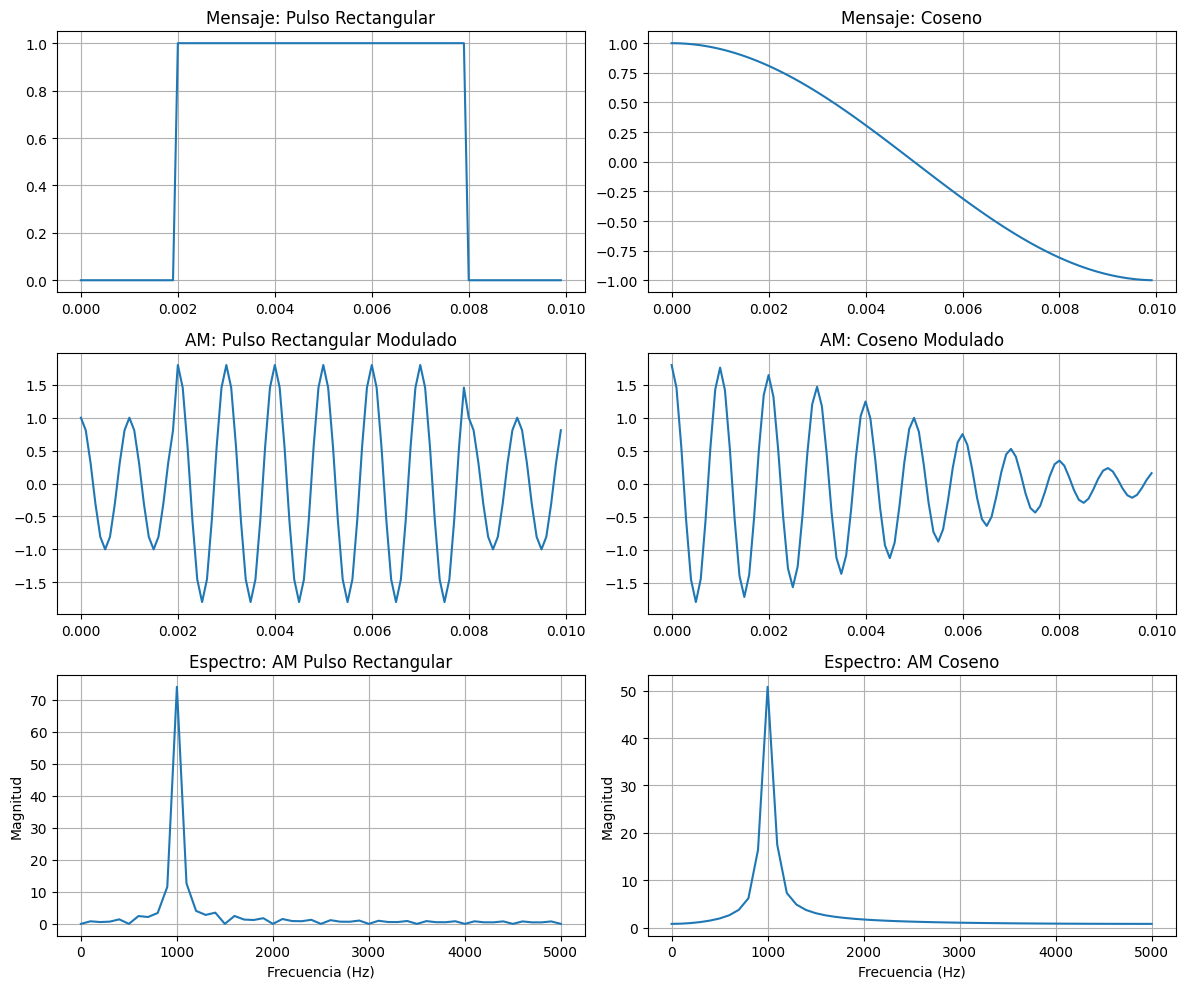

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Parámetros básicos
fs = 10000  # frecuencia de muestreo
T = 0.01    # duración (segundos)
t = np.linspace(0, T, int(fs*T), endpoint=False)
fc = 1000   # frecuencia portadora
ka = 0.8    # índice de modulación (modificable por el usuario)

# Señal mensaje 1: pulso rectangular
m1 = np.zeros_like(t)
m1[int(0.002*fs):int(0.008*fs)] = 1  # pulso entre 2ms y 8ms

# Señal mensaje 2: coseno
fm = 50  # frecuencia del mensaje
m2 = np.cos(2*np.pi*fm*t)

# Señales AM moduladas
s1 = (1 + ka * m1) * np.cos(2 * np.pi * fc * t)
s2 = (1 + ka * m2) * np.cos(2 * np.pi * fc * t)

# Espectros
def plot_fft(signal, title):
    N = len(signal)
    yf = np.abs(rfft(signal))
    xf = rfftfreq(N, 1/fs)
    plt.plot(xf, yf)
    plt.title(title)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")
    plt.grid()

# --- Gráficas ---

plt.figure(figsize=(12, 10))

# Tiempo: pulso rectangular
plt.subplot(3, 2, 1)
plt.plot(t, m1)
plt.title("Mensaje: Pulso Rectangular")
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, s1)
plt.title("AM: Pulso Rectangular Modulado")
plt.grid()

plt.subplot(3, 2, 5)
plot_fft(s1, "Espectro: AM Pulso Rectangular")

# Tiempo: coseno
plt.subplot(3, 2, 2)
plt.plot(t, m2)
plt.title("Mensaje: Coseno")
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, s2)
plt.title("AM: Coseno Modulado")
plt.grid()

plt.subplot(3, 2, 6)
plot_fft(s2, "Espectro: AM Coseno")

plt.tight_layout()
plt.show()

## 1.6 Aplicación en comunicaciones - modulación AM.**

Sea la señal portadora $c(t) = A_c \cos(2\pi F_c t)$, con $A_c, F_c \in \mathbb{R}$, y la señal mensaje $m(t) \in \mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1 + \frac{m(t)}{A_c}\right) c(t)$.

Luego, descargue desde YouTube, 5 segundos de su canción favorita (capturando del segundo 20 al 25).

Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 1). Grafique las señales en tiempo y frecuencia (magnitud) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada.

Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio. Ver Cuaderno guía modulación AM. Luego, sea el demodulador en amplitud presentado en la siguiente Figura:


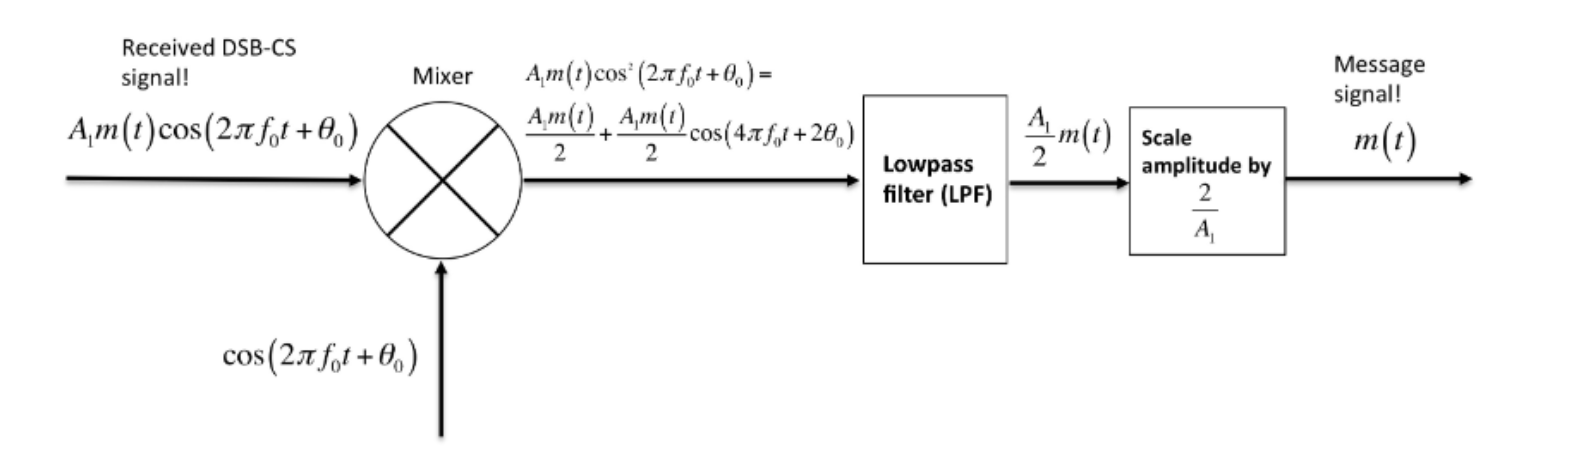

###**Solucion**

In [2]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     / 2.9 MB 10.2 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.10.22-py3-none-any.whl size=3025881 sha256=4d2f554470b6b64813ede097e4ac8d39fbcebb7b1c59accf9f52de52529bd7ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-mi6ax6gh/wheels/b6/70/13/8d2d11b326f983030b72df6408392d5c1b3bc27a9db8b7c5b0
Successfully built yt-dlp


In [3]:
link="https://youtu.be/UaXqj5CBtMU?si=FqQRNO1iNvQsAFJB"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://youtu.be/UaXqj5CBtMU?si=FqQRNO1iNvQsAFJB
[youtube] UaXqj5CBtMU: Downloading webpage
[youtube] UaXqj5CBtMU: Downloading android sdkless player API JSON
[youtube] UaXqj5CBtMU: Downloading web safari player API JSON
[youtube] UaXqj5CBtMU: Downloading m3u8 information
[info] UaXqj5CBtMU: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio
[download] 100% of    3.33MiB in 00:00:00 at 66.57MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [4]:
!ffmpeg -y -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [5]:
!pip install soundfile

In [6]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [7]:
from IPython.display import Audio
ns = 5 #se reproducen los primeros ns segundos
Audio(x[:int(fs*ns),:].T,rate=fs)

/tmp/ipython-input-1853517714.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


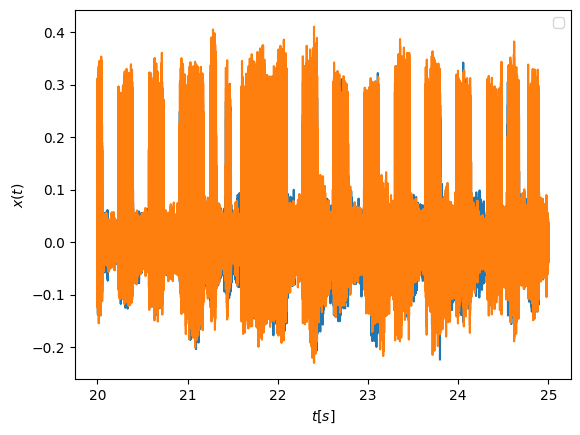

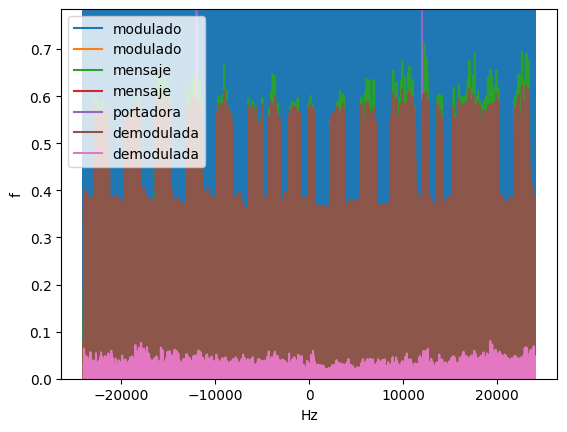

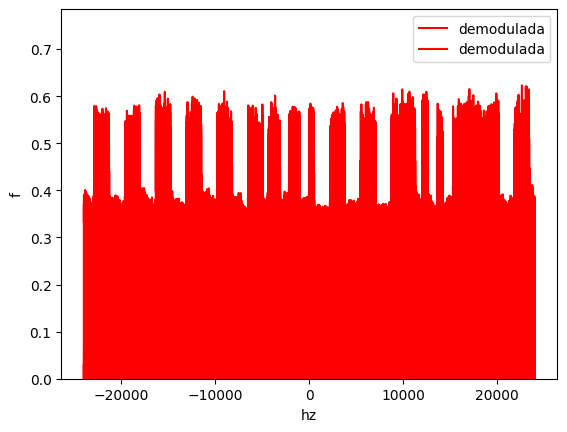

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipython-input-1853517714.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


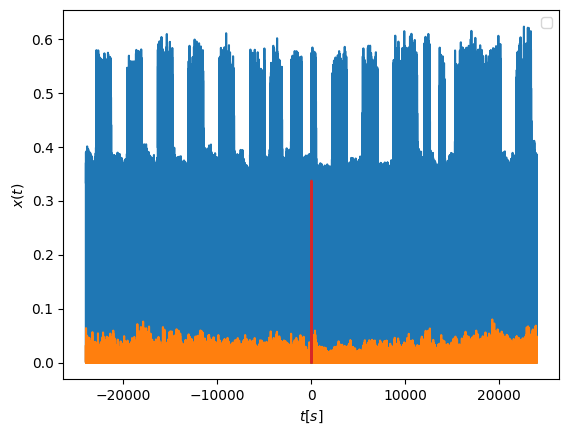

/usr/local/lib/python3.12/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [8]:
xpro = x.copy() #copiar archivos para procesar
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),:]
tt = np.arange(ti,tf,1/fs) # vector de tiempo
Im = 1
Fc = 60000

plt.plot(tt,xs)
plt.legend(('canal 1','canal 2'))
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

Ac = float(np.max(np.abs(xs))/Im)
C = Ac * np.cos(2*np.pi*Fc*tt)

C_reshaped = C.reshape(-1,1)

y = (1+xs/Ac)*C_reshaped

# plt.plot(tt,y)
# plt.legend(('canal 1','canal 2'))
# plt.xlabel('$t[s]$')
# plt.ylabel('$x(t)$')
# plt.legend()
# plt.show()
# Audio(y.T,rate=fs)

d = y * C_reshaped

# plt.plot(tt,d)
# plt.legend(('canal 1','canal 2'))
# plt.xlabel('$t[s]$')
# plt.ylabel('$x(t)$')
# plt.legend()
# plt.show()
# Audio(d.T,rate=fs)
XfC = np.fft.fft(C)
Xfxs = np.fft.fft(xs)
Xfy = np.fft.fft(y)
Xfd = np.fft.fft(d)

vfre = np.fft.fftfreq(len(C),1/fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfxs),label='mensaje')
plt.plot(vfre,abs(XfC),label='portadora')
plt.plot(vfre,abs(Xfd),label='demodulada')
plt.legend()
plt.xlabel('Hz')
plt.ylabel('f')
plt.ylim([np.min(np.abs(Xfxs)), 1.1*np.max(np.abs(Xfxs))])
plt.show()


plt.plot(vfre,abs(Xfd),label='demodulada',c='r')
plt.legend()
plt.xlabel('hz')
plt.ylabel('f')
plt.ylim([np.min(np.abs(Xfxs)), 1.1*np.max(np.abs(Xfxs))])
plt.show()
f1 = 48000 #frecuencia en Hz corte 1
ind = ~(abs(vfre) < f1) #frecuencias eliminar-> recueder que ~ actua como negación
Xfd[ind] = 0
plt.plot(vfre,abs(Xfd))
mr = np.fft.ifft(Xfd)
plt.plot(tt,mr)
plt.legend(('canal 1','canal 2'))
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()
Audio(mr.T,rate=fs)
Audio(xs.T,rate=fs)

## 1.7  Aplicación en circuitos eléctricos - potencia. Consulte en qué consiste la distorsión total de armónicos (*Total Harmonic Distortion-(THD)*) y el factor de potencia en un circuito eléctrico. ¿Cómo puede calcularse el THD desde la FFT?. ¿Cómo puede calcularse la distorsión del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el cálculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones y pruebe con diferentes valores de R y C. Discuta los resultados obtenidos. Ver cuaderno Rectificador RC y THD.


###**Solucion**

### Distorsión Armónica Total (THD)

La **Distorsión Armónica Total (THD)**, del inglés *Total Harmonic Distortion*, es un indicador que cuantifica cuánta "contaminación" armónica existe en una señal de voltaje o corriente.

En esencia, compara la energía total de todos los armónicos (frecuencias múltiplos no deseadas) con la energía de la frecuencia fundamental (la frecuencia principal deseada). Un THD bajo indica una señal "limpia", parecida a una onda senoidal pura.

Su fórmula se define como la raíz de la suma de los cuadrados de las magnitudes de los armónicos, dividida por la magnitud de la fundamental:

$$
\text{THD} = \frac{\sqrt{V_2^2 + V_3^2 + V_4^2 + \dots}}{V_1}
$$

Donde:
* **$V_1$**: Es la magnitud de la componente **fundamental** (la frecuencia base, ej: 60 Hz).
* **$V_n$**: Es la magnitud de la **n-ésima armónica** (ej: $V_2$ es la magnitud a 120 Hz, $V_3$ a 180 Hz, etc.).



###Factor de Potencia (FP)

El **Factor de Potencia (FP)** mide la eficiencia con la que un equipo eléctrico utiliza la energía. Compara la potencia que realiza un trabajo real (**Potencia Activa, W**) con la potencia total que el equipo consume de la red eléctrica (**Potencia Aparente, VA**).

$$
\text{FP} = \frac{\text{Potencia Activa (W)}}{\text{Potencia Aparente (VA)}}
$$

En circuitos modernos que contienen electrónica (cargas no lineales, como un rectificador), el FP total se ve afectado por dos fenómenos distintos, por lo que se descompone en dos factores:

$$
\text{FP} = \text{DPF} \cdot \text{DF}
$$

Donde:
* **$\text{DPF}$ (Factor de Potencia por Desfase)**: Es el $\cos(\varphi)$ tradicional. Mide el desfase (retraso o adelanto) entre el *voltaje fundamental* y la *corriente fundamental*.
* **$\text{DF}$ (Factor de Potencia por Distorsión)**: Este factor mide cuánta distorsión introducen los armónicos de la **corriente**.

Este factor de distorsión (DF) se calcula directamente a partir del THD de la **corriente** (denotado como $\text{THD}_i$):

$$
\text{DF} = \frac{1}{\sqrt{1 + \text{THD}_i^2}}
$$



### Cálculo del THD usando la FFT

La **Transformada Rápida de Fourier (FFT)** es la herramienta principal para calcular el THD, ya que descompone una señal del dominio del tiempo a sus componentes en el dominio de la frecuencia (su espectro).

El procedimiento es el siguiente:

1.  **Obtener el Espectro:** Se aplica la FFT a la señal (de corriente o voltaje) muestreada en el tiempo.
2.  **Identificar la Fundamental ($V_1$):** Se busca la magnitud del pico más grande en la frecuencia base (ej. 50 Hz o 60 Hz). Esta es la magnitud de la componente fundamental.
3.  **Identificar los Armónicos ($V_n$):** Se miden las magnitudes de los picos que aparecen en las frecuencias múltiplos de la fundamental (ej. 100 Hz, 150 Hz, 200 Hz, etc.).
4.  **Aplicar la Fórmula:** Con las magnitudes $V_1$ (o $I_1$) y $V_n$ (o $I_n$) obtenidas, se utiliza la fórmula de THD mostrada en la primera sección.

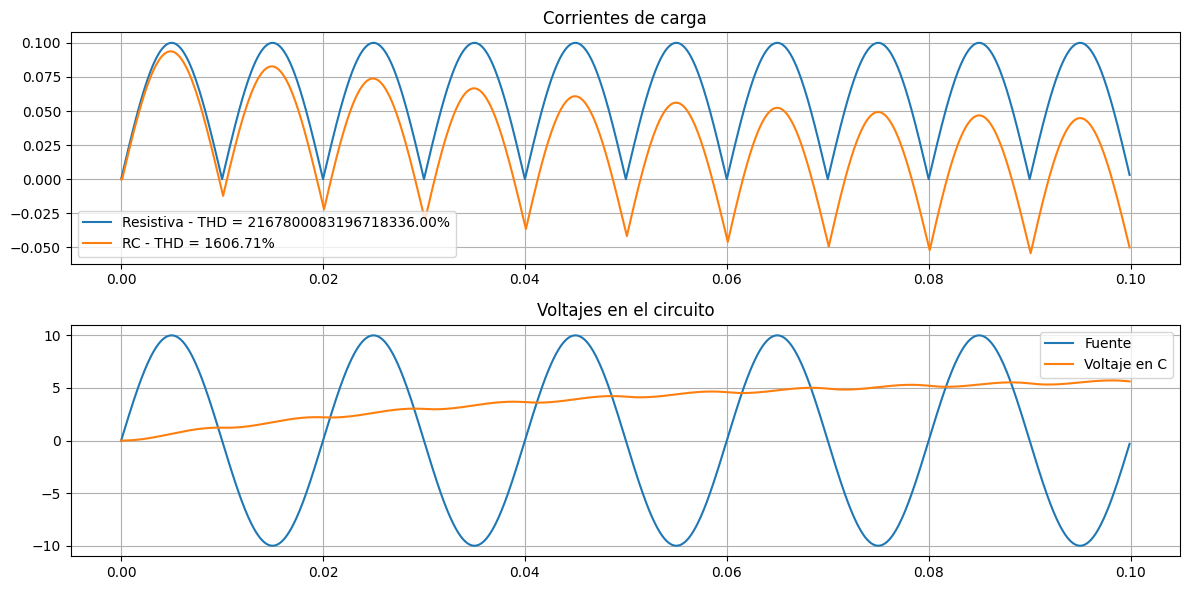

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Parámetros
fs = 10000
t = np.linspace(0, 0.1, int(fs*0.1), endpoint=False)
f = 50
vin = 10 * np.sin(2 * np.pi * f * t)

# Rectificador de onda completa (valor absoluto)
vout = np.abs(vin)

# i) Carga resistiva
R = 100
iR = vout / R

# ii) Carga RC
C = 470e-6
dt = 1/fs
vC = np.zeros_like(t)
iRC = np.zeros_like(t)

for n in range(1, len(t)):
    dv = (vout[n-1] - vC[n-1]) / R
    iRC[n] = dv
    vC[n] = vC[n-1] + dt * (iRC[n]/C)

# --- FFT y THD ---
def compute_thd(signal, fs, f_base):
    yf = np.abs(rfft(signal))
    xf = rfftfreq(len(signal), 1/fs)
    f_res = fs / len(signal)
    i_fund = np.argmax((xf >= f_base - f_res) & (xf <= f_base + f_res))
    V1 = yf[i_fund]
    Vn = np.delete(yf[:len(yf)//2], i_fund)  # armónicos sin fundamental
    thd = np.sqrt(np.sum(Vn**2)) / V1
    return thd

# Cálculo de THD
thd_R = compute_thd(iR, fs, f)
thd_RC = compute_thd(iRC, fs, f)

# Factor de potencia de distorsión
fpd_R = 1 / np.sqrt(1 + thd_R**2)
fpd_RC = 1 / np.sqrt(1 + thd_RC**2)

# --- Gráficas ---
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(t, iR, label=f"Resistiva - THD = {thd_R:.2%}")
plt.plot(t, iRC, label=f"RC - THD = {thd_RC:.2%}")
plt.title("Corrientes de carga")
plt.legend(); plt.grid()

plt.subplot(2,1,2)
plt.plot(t, vin, label="Fuente")
plt.plot(t, vC, label="Voltaje en C")
plt.title("Voltajes en el circuito")
plt.legend(); plt.grid()
plt.tight_layout()
plt.show()

## 1.8 Utilizando la herramienta Streamlit, genere un dashboard para los ejercicios i) **Aplicacion en comunicaciones - modulacion AM** y ii) **Aplicacion en circuitos electricos - potencia**

###**Solucion**

In [2]:
!pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.3 MB/s eta 0:00:00


In [3]:
!mkdir pages

In [4]:
%%writefile 0_👋_Hello.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
from scipy.fft import rfft, rfftfreq

st.set_page_config(
    page_title="Dashboard AM y Circuitos",
    page_icon="👋",
)

st.title("🔊 Dashboard Interactivo")

menu = st.sidebar.radio("Selecciona una sección", ["📻 Modulación AM", "🔌 Circuitos Eléctricos"])

if menu == "📻 Modulación AM":
    st.header("🎧 Modulación AM de audio YouTube")

    link = st.text_input("URL de YouTube", "https://www.youtube.com/watch?v=nmFdyBUAsfQ")
    ti = st.slider("Tiempo inicial [s]", 0, 50, 20)
    tf = st.slider("Tiempo final [s]", ti+1, 60, 25)
    fc = st.slider("Frecuencia portadora [Hz]", 1000, 100000, 60000, step=1000)

    if st.button("Procesar audio"):
        os.system(f"yt-dlp --extract-audio -o 'audio' --audio-format mp3 {link}")
        os.system("ffmpeg -y -i audio.mp3 output.wav")

        x, fs = sf.read("output.wav")
        xpro = x.copy()
        xs = xpro[int(ti*fs):int(tf*fs), :]
        tt = np.arange(ti, tf, 1/fs)

        st.audio("output.wav")

        Im = 1
        Ac = float(np.max(np.abs(xs))/Im)
        C = Ac * np.cos(2*np.pi*fc*tt)
        C_reshaped = C.reshape(-1,1)
        y = (1 + xs/Ac) * C_reshaped
        d = y * C_reshaped

        XfC = np.fft.fft(C)
        Xfxs = np.fft.fft(xs[:,0])
        Xfy = np.fft.fft(y[:,0])
        Xfd = np.fft.fft(d[:,0])
        vfre = np.fft.fftfreq(len(C), 1/fs)

        fig, ax = plt.subplots()
        ax.plot(vfre, abs(Xfy), label='Modulada')
        ax.plot(vfre, abs(Xfxs), label='Mensaje')
        ax.plot(vfre, abs(XfC), label='Portadora')
        ax.plot(vfre, abs(Xfd), label='Demodulada')
        ax.set_xlim(0, fs/2)
        ax.legend(); ax.set_title("Espectros")
        st.pyplot(fig)

elif menu == "🔌 Circuitos Eléctricos":
    st.header("⚡ Simulación de circuito con carga resistiva y RC")

    fs = 10000
    t = np.linspace(0, 0.1, int(fs*0.1), endpoint=False)
    f = st.slider("Frecuencia de la fuente (Hz)", 10, 1000, 50)
    vin = 10 * np.sin(2 * np.pi * f * t)
    vout = np.abs(vin)

    R = st.number_input("Resistencia (Ohm)", value=100)
    iR = vout / R

    C = st.number_input("Capacitancia (F)", value=470e-6, format="%.1e")
    dt = 1/fs
    vC = np.zeros_like(t)
    iRC = np.zeros_like(t)

    for n in range(1, len(t)):
        dv = (vout[n-1] - vC[n-1]) / R
        iRC[n] = dv
        vC[n] = vC[n-1] + dt * (iRC[n]/C)

    def compute_thd(signal, fs, f_base):
        yf = np.abs(rfft(signal))
        xf = rfftfreq(len(signal), 1/fs)
        f_res = fs / len(signal)
        i_fund = np.argmax((xf >= f_base - f_res) & (xf <= f_base + f_res))
        V1 = yf[i_fund]
        Vn = np.delete(yf[:len(yf)//2], i_fund)
        thd = np.sqrt(np.sum(Vn**2)) / V1
        return thd

    thd_R = compute_thd(iR, fs, f)
    thd_RC = compute_thd(iRC, fs, f)
    fpd_R = 1 / np.sqrt(1 + thd_R**2)
    fpd_RC = 1 / np.sqrt(1 + thd_RC**2)

    st.markdown(f"**THD (Resistiva):** {thd_R:.2%} — **FPD:** {fpd_R:.2%}")
    st.markdown(f"**THD (RC):** {thd_RC:.2%} — **FPD:** {fpd_RC:.2%}")

    fig, axs = plt.subplots(2, 1, figsize=(10, 6))
    axs[0].plot(t, iR, label=f"Resistiva - THD = {thd_R:.2%}")
    axs[0].plot(t, iRC, label=f"RC - THD = {thd_RC:.2%}")
    axs[0].legend(); axs[0].grid(); axs[0].set_title("Corrientes")

    axs[1].plot(t, vin, label="Fuente")
    axs[1].plot(t, vC, label="Voltaje en C")
    axs[1].legend(); axs[1].grid(); axs[1].set_title("Voltajes")

    st.pyplot(fig)

Writing 0_👋_Hello.py


In [5]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared

#Ejecutar Streamlit
!streamlit run 0_👋_Hello.py &>/content/logs.txt & #Cambiar 0_👋_Hello.py por el nombre de tu archivo principal

#Exponer el puerto 8501 con Cloudflare Tunnel
!cloudflared tunnel --url http://localhost:8501 > /content/cloudflared.log 2>&1 &

#Leer la URL pública generada por Cloudflare
import time
time.sleep(5)  # Esperar que se genere la URL

import re
found_context = False  # Indicador para saber si estamos en la sección correcta

with open('/content/cloudflared.log') as f:
    for line in f:
        #Detecta el inicio del contexto que nos interesa
        if "Your quick Tunnel has been created" in line:
            found_context = True

        #Busca una URL si ya se encontró el contexto relevante
        if found_context:
            match = re.search(r'https?://\S+', line)
            if match:
                url = match.group(0)  #Extrae la URL encontrada
                print(f'Tu aplicación está disponible en: {url}')
                break  #Termina el bucle después de encontrar la URL

--2025-11-10 00:00:40--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64 [following]
--2025-11-10 00:00:40--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/955e9d1b-ac5e-4188-8867-e5f53958a8fe?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-10T00%3A52%3A15Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-09

In [6]:
import os

res = input("Digite (1) para finalizar la ejecución del Dashboard: ")

if res.upper() == "1":
    os.system("pkill streamlit")  # Termina el proceso de Streamlit
    print("El proceso de Streamlit ha sido finalizado.")


Digite (1) para finalizar la ejecución del Dashboard: 2
